In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from lazypredict.Supervised import LazyRegressor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [27]:
#loading training and testing data
Data_12month_booking = pd.read_csv('12month_flight_booking.csv')
Data_12month_revenue = pd.read_csv('12months_flight_revenue.csv')
Data_3month_booking = pd.read_csv('3months_flight_booking_prediction.csv')
Data_3month_revenue = pd.read_csv('3months_flight_revenue_prediction.csv')

In [28]:
Data_12month_booking

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,0,BBB,DDD,Y,N,200.01,AA,304,2022-04-10,05:55,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10
1,1,BBB,DDD,Y,H,463.65,AA,304,2022-04-10,05:55,...,0.00,0.00,0.00,1.00,6.00,7.00,7.00,7.00,7.00,7
2,2,BBB,DDD,Y,G,149.83,AA,304,2022-04-10,05:55,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
3,3,BBB,DDD,Y,T,127.29,AA,304,2022-04-10,05:55,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5
4,4,BBB,DDD,Y,S,90.92,AA,304,2022-04-10,05:55,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,212776,YYY,CCC,Y,I,262.00,AA,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195770,212777,YYY,CCC,Y,T,301.27,AA,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195771,212778,YYY,CCC,Y,M,386.14,AA,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195772,212779,YYY,CCC,Y,H,809.18,AA,65,2023-09-20,17:45,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5


In [30]:
Data_12month_booking.drop('Unnamed: 0', axis=1)
Data_12month_booking.drop('Airline', axis=1)

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,BBB,DDD,Y,N,200.01,AA,304,2022-04-10,05:55,NaN,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10
1,BBB,DDD,Y,H,463.65,AA,304,2022-04-10,05:55,NaN,...,0.00,0.00,0.00,1.00,6.00,7.00,7.00,7.00,7.00,7
2,BBB,DDD,Y,G,149.83,AA,304,2022-04-10,05:55,NaN,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
3,BBB,DDD,Y,T,127.29,AA,304,2022-04-10,05:55,NaN,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5
4,BBB,DDD,Y,S,90.92,AA,304,2022-04-10,05:55,NaN,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,YYY,CCC,Y,I,262.00,AA,65,2023-09-20,17:45,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195770,YYY,CCC,Y,T,301.27,AA,65,2023-09-20,17:45,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195771,YYY,CCC,Y,M,386.14,AA,65,2023-09-20,17:45,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195772,YYY,CCC,Y,H,809.18,AA,65,2023-09-20,17:45,NaN,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5


In [35]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_12month_booking[' Origin'] = label_encoder.fit_transform(Data_12month_booking[' Origin'])
Data_12month_booking[' Destination'] = label_encoder.fit_transform(Data_12month_booking[' Destination'])

In [36]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_12month_booking['Cabin'] = Data_12month_booking['Cabin'].map(cabin_mapping)

In [38]:
Airline_map = {'AA':1}
Data_12month_booking['Airline'] = Data_12month_booking['Airline'].map(Airline_map)

In [39]:
Data_12month_booking

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,0,1,3,1.00,N,200.01,1,304,2022-04-10,05:55,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10
1,1,1,3,1.00,H,463.65,1,304,2022-04-10,05:55,...,0.00,0.00,0.00,1.00,6.00,7.00,7.00,7.00,7.00,7
2,2,1,3,1.00,G,149.83,1,304,2022-04-10,05:55,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
3,3,1,3,1.00,T,127.29,1,304,2022-04-10,05:55,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5
4,4,1,3,1.00,S,90.92,1,304,2022-04-10,05:55,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,212776,3,2,1.00,I,262.00,1,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195770,212777,3,2,1.00,T,301.27,1,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195771,212778,3,2,1.00,M,386.14,1,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
195772,212779,3,2,1.00,H,809.18,1,65,2023-09-20,17:45,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5


In [90]:
for column in Data_3month_booking.columns:
    print(column)

Unnamed: 0
 Origin
 Destination
Cabin
Booking Class
 Booking Class Fare USD 
Airline
Flight number
Class RDay Res Hold Total RDay: 326
Class RDay Res Hold Total RDay: 325
Class RDay Res Hold Total RDay: 324
Class RDay Res Hold Total RDay: 323
Class RDay Res Hold Total RDay: 322
Class RDay Res Hold Total RDay: 321
Class RDay Res Hold Total RDay: 320
Class RDay Res Hold Total RDay: 319
Class RDay Res Hold Total RDay: 318
Class RDay Res Hold Total RDay: 317
Class RDay Res Hold Total RDay: 316
Class RDay Res Hold Total RDay: 315
Class RDay Res Hold Total RDay: 314
Class RDay Res Hold Total RDay: 313
Class RDay Res Hold Total RDay: 312
Class RDay Res Hold Total RDay: 311
Class RDay Res Hold Total RDay: 310
Class RDay Res Hold Total RDay: 309
Class RDay Res Hold Total RDay: 308
Class RDay Res Hold Total RDay: 307
Class RDay Res Hold Total RDay: 306
Class RDay Res Hold Total RDay: 305
Class RDay Res Hold Total RDay: 304
Class RDay Res Hold Total RDay: 303
Class RDay Res Hold Total RDay: 302
C

In [48]:
Data_12month_booking[' Booking Class Fare USD ']

0        200.01
1        463.65
2        149.83
3        127.29
4         90.92
          ...  
195769   262.00
195770   301.27
195771   386.14
195772   809.18
195773   425.34
Name:  Booking Class Fare USD , Length: 195774, dtype: float64

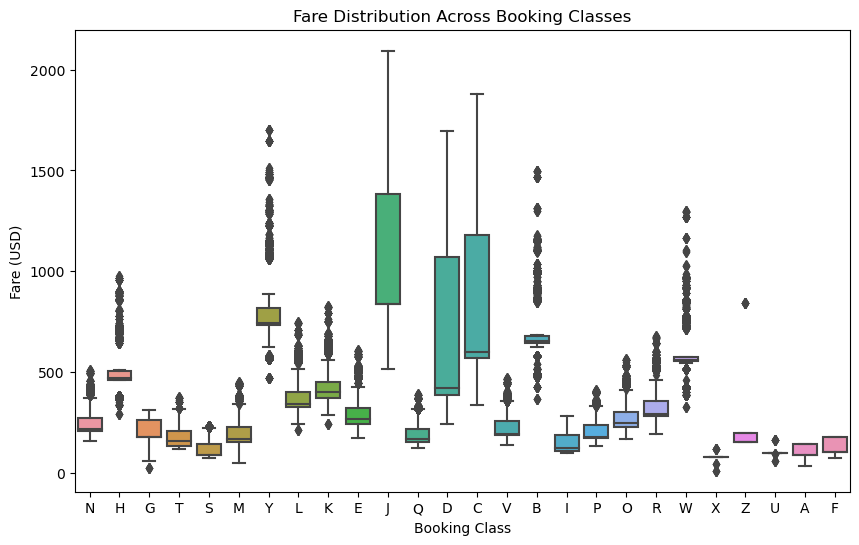

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Booking Class' is categorical and 'Booking Class Fare USD' is numerical

# Boxplot to compare fare distribution across different booking classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Booking Class', y=' Booking Class Fare USD ', data=Data_12month_booking)
plt.title('Fare Distribution Across Booking Classes')
plt.xlabel('Booking Class')
plt.ylabel('Fare (USD)')
plt.show()

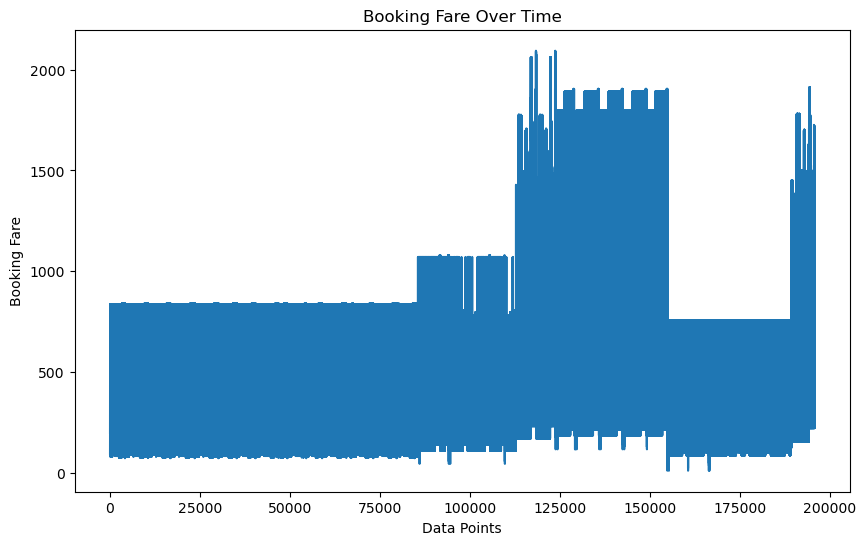

In [50]:
import matplotlib.pyplot as plt

# Assuming 'Booking Class Fare USD' is the column representing the fare
plt.figure(figsize=(10, 6))
plt.plot(Data_12month_booking[' Booking Class Fare USD '])
plt.title('Booking Fare Over Time')
plt.xlabel('Data Points')
plt.ylabel('Booking Fare')
plt.show()


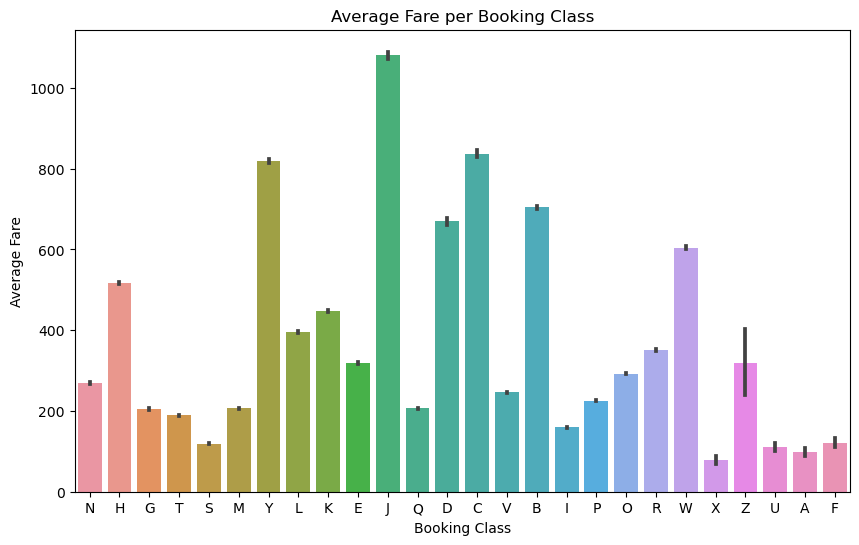

In [51]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Class', y=' Booking Class Fare USD ', data=Data_12month_booking)
plt.title('Average Fare per Booking Class')
plt.xlabel('Booking Class')
plt.ylabel('Average Fare')
plt.show()


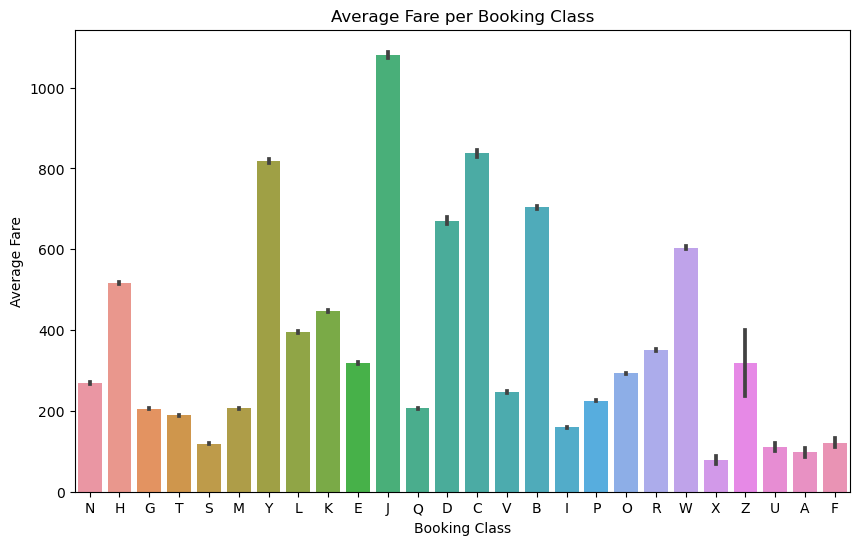

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Class', y=' Booking Class Fare USD ', data=Data_12month_booking)
plt.title('Average Fare per Booking Class')
plt.xlabel('Booking Class')
plt.ylabel('Average Fare')
plt.show()

In [54]:
print(Data_12month_booking[' Booking Class Fare USD '].describe())

count   195774.00
mean       422.12
std        319.58
min         12.00
25%        196.38
50%        326.60
75%        554.56
max       2093.23
Name:  Booking Class Fare USD , dtype: float64


In [55]:
# Mean of 'Booking Class Fare USD' grouped by 'Booking Class'
mean_fare_by_class = Data_12month_booking.groupby('Booking Class')[' Booking Class Fare USD '].mean()
print(mean_fare_by_class)

Booking Class
A     98.14
B    704.32
C    837.16
D    670.40
E    317.94
F    121.66
G    205.08
H    517.01
I    159.60
J   1080.65
K    447.58
L    395.50
M    206.51
N    269.16
O    292.68
P    225.41
Q    206.37
R    351.56
S    118.57
T    188.99
U    110.16
V    246.59
W    604.17
X     78.88
Y    819.01
Z    319.26
Name:  Booking Class Fare USD , dtype: float64


In [56]:
Data_3month_booking.drop('Unnamed: 0', axis=1)
Data_3month_booking.drop('Airline', axis=1)

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,1663,BBB,DDD,Y,S,90.92,306,2023-10-02,06:05,NaN,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11
1,1664,BBB,DDD,Y,G,179.80,306,2023-10-02,06:05,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,1665,BBB,DDD,Y,N,209.10,306,2023-10-02,06:05,NaN,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4
3,1666,BBB,DDD,Y,T,136.38,306,2023-10-02,06:05,NaN,...,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25
4,1667,BBB,DDD,Y,B,645.47,306,2023-10-02,06:05,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,212796,YYY,CCC,Y,W,968.69,65,2023-09-21,17:45,NaN,...,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8
17023,212797,YYY,CCC,J,D,1348.90,65,2023-09-21,17:45,NaN,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
17024,212798,YYY,CCC,Y,Q,316.91,65,2023-09-21,17:45,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
17025,212799,YYY,CCC,Y,K,693.79,65,2023-09-21,17:45,NaN,...,6.00,6.00,6.00,7.00,7.00,7.00,7.00,7.00,7.00,7


In [58]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_3month_booking[' Origin'] = label_encoder.fit_transform(Data_3month_booking[' Origin'])
Data_3month_booking[' Destination'] = label_encoder.fit_transform(Data_3month_booking[' Destination'])

In [59]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_3month_booking['Cabin'] = Data_3month_booking['Cabin'].map(cabin_mapping)

In [60]:
Airline_map = {'AA':1}
Data_3month_booking['Airline'] = Data_3month_booking['Airline'].map(Airline_map)

In [61]:
Data_3month_booking

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,1663,1,3,1.00,S,90.92,1,306,2023-10-02,06:05,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11
1,1664,1,3,1.00,G,179.80,1,306,2023-10-02,06:05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,1665,1,3,1.00,N,209.10,1,306,2023-10-02,06:05,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4
3,1666,1,3,1.00,T,136.38,1,306,2023-10-02,06:05,...,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25
4,1667,1,3,1.00,B,645.47,1,306,2023-10-02,06:05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,212796,3,2,1.00,W,968.69,1,65,2023-09-21,17:45,...,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8
17023,212797,3,2,NaN,D,1348.90,1,65,2023-09-21,17:45,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
17024,212798,3,2,1.00,Q,316.91,1,65,2023-09-21,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
17025,212799,3,2,1.00,K,693.79,1,65,2023-09-21,17:45,...,6.00,6.00,6.00,7.00,7.00,7.00,7.00,7.00,7.00,7


In [63]:
label_encoder = LabelEncoder()
Data_12month_booking['Booking Class'] = label_encoder.fit_transform(Data_12month_booking['Booking Class'])


In [71]:
Data_12month_booking

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Dep_Date_Numerical,Dep_Hour,Dep_Minute
0,0,1,3,1.00,13,200.01,1,304,2022-04-10,05:55,...,10.00,10.00,10.00,10.00,10.00,10.00,10,99,5,55
1,1,1,3,1.00,7,463.65,1,304,2022-04-10,05:55,...,1.00,6.00,7.00,7.00,7.00,7.00,7,99,5,55
2,2,1,3,1.00,6,149.83,1,304,2022-04-10,05:55,...,1.00,1.00,1.00,1.00,1.00,1.00,1,99,5,55
3,3,1,3,1.00,19,127.29,1,304,2022-04-10,05:55,...,5.00,5.00,5.00,5.00,5.00,5.00,5,99,5,55
4,4,1,3,1.00,18,90.92,1,304,2022-04-10,05:55,...,10.00,10.00,10.00,10.00,10.00,10.00,10,99,5,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,212776,3,2,1.00,8,262.00,1,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0,627,17,45
195770,212777,3,2,1.00,19,301.27,1,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0,627,17,45
195771,212778,3,2,1.00,12,386.14,1,65,2023-09-20,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0,627,17,45
195772,212779,3,2,1.00,7,809.18,1,65,2023-09-20,17:45,...,5.00,5.00,5.00,5.00,5.00,5.00,5,627,17,45


In [66]:
# Convert 'Dep_Date' to a numerical format (e.g., number of days since a specific date)
# Assuming the date is in the format 'YYYY-MM-DD'
Data_12month_booking['Dep_Date'] = pd.to_datetime(Data_12month_booking['Dep_Date'])
Data_12month_booking['Dep_Date_Numerical'] = (Data_12month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days


In [70]:
# Split 'Dep_Time' into hours and minutes
Data_12month_booking['Dep_Hour'] = Data_12month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_12month_booking['Dep_Minute'] = Data_12month_booking['Dep_time'].str.split(':').str[1].astype(int)


In [73]:
# Drop the original 'Dep_Date' and 'Dep_Time' columns
Data_12month_booking = Data_12month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)


In [82]:
# Drop columns with all NaN values
Data_12month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_12month_booking) * 0.05  # 20% threshold
Data_12month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_12month_booking.fillna(0.00, inplace=True)

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Class RDay Res Hold Total RDay: 309,Class RDay Res Hold Total RDay: 308,...,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Dep_Date_Numerical,Dep_Hour,Dep_Minute
0,0,1,3,1.00,13,200.01,1,304,0.00,0.00,...,10.00,10.00,10.00,10.00,10.00,10.00,10,99,5,55
1,1,1,3,1.00,7,463.65,1,304,0.00,0.00,...,1.00,6.00,7.00,7.00,7.00,7.00,7,99,5,55
2,2,1,3,1.00,6,149.83,1,304,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1,99,5,55
3,3,1,3,1.00,19,127.29,1,304,0.00,0.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5,99,5,55
4,4,1,3,1.00,18,90.92,1,304,0.00,0.00,...,10.00,10.00,10.00,10.00,10.00,10.00,10,99,5,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,212776,3,2,1.00,8,262.00,1,65,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,627,17,45
195770,212777,3,2,1.00,19,301.27,1,65,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,627,17,45
195771,212778,3,2,1.00,12,386.14,1,65,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,627,17,45
195772,212779,3,2,1.00,7,809.18,1,65,0.00,0.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5,627,17,45


In [83]:
Data_3month_booking

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,1663,1,3,1.00,S,90.92,1,306,2023-10-02,06:05,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11
1,1664,1,3,1.00,G,179.80,1,306,2023-10-02,06:05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,1665,1,3,1.00,N,209.10,1,306,2023-10-02,06:05,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4
3,1666,1,3,1.00,T,136.38,1,306,2023-10-02,06:05,...,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25
4,1667,1,3,1.00,B,645.47,1,306,2023-10-02,06:05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,212796,3,2,1.00,W,968.69,1,65,2023-09-21,17:45,...,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8
17023,212797,3,2,NaN,D,1348.90,1,65,2023-09-21,17:45,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
17024,212798,3,2,1.00,Q,316.91,1,65,2023-09-21,17:45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
17025,212799,3,2,1.00,K,693.79,1,65,2023-09-21,17:45,...,6.00,6.00,6.00,7.00,7.00,7.00,7.00,7.00,7.00,7


In [86]:
label_encoder = LabelEncoder()
Data_3month_booking['Booking Class'] = label_encoder.fit_transform(Data_3month_booking['Booking Class'])
Data_3month_booking['Dep_Date'] = pd.to_datetime(Data_3month_booking['Dep_Date'])
Data_3month_booking['Dep_Date_Numerical'] = (Data_3month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

Data_3month_booking['Dep_Hour'] = Data_3month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_3month_booking['Dep_Minute'] = Data_3month_booking['Dep_time'].str.split(':').str[1].astype(int)
Data_3month_booking = Data_3month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)

# Drop columns with all NaN values
Data_3month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_3month_booking) * 0.05  # 5% threshold
Data_3month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_3month_booking.fillna(0.00, inplace=True)


In [87]:
Data_3month_booking

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Class RDay Res Hold Total RDay: 326,Class RDay Res Hold Total RDay: 325,...,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Dep_Date_Numerical,Dep_Hour,Dep_Minute
0,1663,1,3,1.00,16,90.92,1,306,0.00,0.00,...,11.00,11.00,11.00,11.00,11.00,11.00,11,639,6,5
1,1664,1,3,1.00,4,179.80,1,306,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,639,6,5
2,1665,1,3,1.00,11,209.10,1,306,0.00,0.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4,639,6,5
3,1666,1,3,1.00,17,136.38,1,306,0.00,0.00,...,25.00,25.00,25.00,25.00,25.00,25.00,25,639,6,5
4,1667,1,3,1.00,0,645.47,1,306,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,639,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,212796,3,2,1.00,19,968.69,1,65,0.00,0.00,...,8.00,8.00,8.00,8.00,8.00,8.00,8,628,17,45
17023,212797,3,2,0.00,2,1348.90,1,65,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1,628,17,45
17024,212798,3,2,1.00,14,316.91,1,65,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0,628,17,45
17025,212799,3,2,1.00,8,693.79,1,65,0.00,0.00,...,7.00,7.00,7.00,7.00,7.00,7.00,7,628,17,45


In [89]:
Features = [
    ' Origin', ' Destination', 'Cabin', 'Booking Class', 'Airline', 'Flight number',
    'Dep_Date_Numerical', 'Dep_Hour', 'Dep_Minute'
]

for i in range(310):
    feature_name = f'Class RDay Res Hold Total RDay: {i}'
    Features.append(feature_name)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'Data_12month_booking' contains the training data and 'Data_3month_booking' has test data
# Features and Target
X_train = Data_12month_booking[Features]  # Features for training
y_train = Data_12month_booking[' Booking Class Fare USD ']  # Target for training

X_test = Data_3month_booking[Features]  # Features for testing
y_test = Data_3month_booking[' Booking Class Fare USD ']  # Target for testing

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
predictions = model.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 55837.77488661236


In [94]:
from sklearn.metrics import r2_score

# Calculate the R-squared (R2 score) to evaluate the model's performance
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.46825719430220747


In [95]:
#implementing the lazy regressor model to find the best model to use
reg = LazyRegressor(verbose=0,
                    ignore_warnings=False,
                    custom_metric=None)

models, predictions = reg.fit(X_train, X_test,
                              y_train, y_test)
print(models)

 24%|██▍       | 10/42 [08:57<44:19, 83.11s/it]  

: 